## Baseline Model

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from utils.utils import apply_one_hot_encoding, full_categorical_columns, align_features, numerical_columns, evaluate_model, remove_outliers, apply_scaling, total_columns_to_check
from utils.model import save_model
from utils.graph import plot_actual_vs_predicted
from sklearn.preprocessing import StandardScaler

# Load the cleaned data from the specified path
train_data = pd.read_csv("data/cleaned_Train.csv")

# Separate features (X) and target (y)
# Encode categorical variables in training data
# One-Hot Encoding
X = apply_one_hot_encoding(train_data, target_column='total_cost', categorical_columns=full_categorical_columns)
y = train_data['total_cost']

# Confirm the shapes
print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

Feature matrix shape: (4809, 159)
Target variable shape: (4809,)


In [11]:
if 'total_cost' not in X.columns:
    print("'total_cost' has been successfully dropped.")
else:
    print("'total_cost' still exists in the feature matrix.")
    
X

'total_cost' has been successfully dropped.


,total_female,total_male,night_mainland,night_zanzibar,country_encoded,total_people,total_nights,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,...,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_Missing,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,13.0,0.0,89,2.0,13.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.0,0.0,14.0,7.0,99,1.0,21.0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,0.0,1.0,1.0,31.0,99,1.0,32.0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1.0,1.0,11.0,0.0,99,2.0,11.0,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,1.0,0.0,7.0,4.0,13,1.0,11.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,0.0,1.0,2.0,0.0,95,1.0,2.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4805,1.0,1.0,11.0,0.0,100,2.0,11.0,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4806,1.0,0.0,3.0,7.0,64,1.0,10.0,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4807,1.0,1.0,5.0,0.0,83,2.0,5.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

Training set shape: (3847, 159) (3847,)
Validation set shape: (962, 159) (962,)


In [13]:
# Evaluate on validation set
metrics = evaluate_model(y_val, y_val_pred)

Validation Set Metrics:
Mean Absolute Error (MAE): 59891551471.02701
Mean Squared Error (MSE): 2.0834415919837494e+24
Root Mean Squared Error (RMSE): 1443413174383.4644
R² Score: -14755274979.516308


### The Results of Linear Regression Look Off: Analysis and Potential Issues

**Problem:**  
The Linear Regression baseline model results are extremely off, with a very large **Mean Absolute Error (MAE)** and a **negative R² score**. This suggests that the model is not fitting the data well.

---

### **What Could Be Going Wrong?**

1. **Feature Scaling:**  
   Linear Regression is very sensitive to the scale of the features. If some features have much larger magnitudes than others (e.g., `total_nights`, `total_female` vs encoded categorical features), the model coefficients may become distorted.  
   - **Solution:** Normalize or standardize numerical features to bring them to a similar scale.

2. **Outliers:**  
   Linear Regression assumes that data is **normally distributed** without significant outliers. If extreme values exist, they can skew the model results and metrics.  
   - **Solution:** Handle outliers by capping, log transformation, or removing extreme values if justified.

---

### **Steps to Address These Issues:**

1. **Normalize Features:** Use **StandardScaler** or **MinMaxScaler** to scale numerical features.
2. **Inspect and Handle Outliers:** Analyze numerical features for outliers and apply appropriate techniques (e.g., log transformation).
3. **Verify Encoded Features:** Ensure that categorical features are properly one-hot encoded or ordinally encoded.
4. **Re-train the Model:** Re-run the Linear Regression after scaling and outlier removal to check performance improvements.

---


In [14]:
# Load cleaned data
train_data_V2 = pd.read_csv("data/cleaned_Train.csv")
# Normalize Numerical Features
scaler_v2 = StandardScaler()
scaled_numerical_data_v2 = scaler_v2.fit_transform(train_data_V2[numerical_columns])
# scaled_numerical_df_v2 = pd.DataFrame(scaled_numerical_data_v2, columns=numerical_columns, index=train_data_V2.index)
# Replace numerical columns with scaled data
# train_data_V2.update(scaled_numerical_df_v2)
train_data_V2[numerical_columns] = scaled_numerical_data_v2

# Apply one-hot encoding
X_v2 = apply_one_hot_encoding(train_data_V2, target_column='total_cost', categorical_columns=full_categorical_columns)
y_v2 = train_data_V2['total_cost']

# Split training and validation sets
X_train_v2, X_val_v2, y_train_v2, y_val_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model_v2 = LinearRegression()
linear_model_v2.fit(X_train_v2, y_train_v2)

# Validate the model
y_val_v2_pred = linear_model_v2.predict(X_val_v2)

In [15]:
# Evaluate the model
metrics_v2 = evaluate_model(y_val_v2, y_val_v2_pred)

Validation Set Metrics:
Mean Absolute Error (MAE): 6033157907987.222
Mean Squared Error (MSE): 2.4922413560631385e+28
Root Mean Squared Error (RMSE): 157868342490289.62
R² Score: -176504619414418.8


## New Result

From the result, it seems the model performed worse after scaling. This suggests that scaling might not be sufficient or suitable for this dataset in its current form.

## Next Steps:
- Investigate and adjust outliers in the dataset to ensure they do not skew the model.
- Reevaluate the model after removing or capping outliers to observe the impact on performance.
- Explore alternative preprocessing techniques if necessary to improve the model's performance.

In [18]:
# Load cleaned data
train_data_v3 = pd.read_csv("data/cleaned_Train.csv")

# Remove outliers
train_data_v3 = remove_outliers(train_data_v3, columns=total_columns_to_check, method='iqr')

# Normalize Numerical Features
train_data_v3, scaler_v3 = apply_scaling(train_data_v3, numerical_columns)

# Normalize Numerical Features
scaled_numerical_data_v3 = scaler_v3.fit_transform(train_data_v3[numerical_columns])
train_data_v3[numerical_columns] = scaled_numerical_data_v3

# Apply one-hot encoding
X_v3 = apply_one_hot_encoding(train_data_v3, target_column='total_cost', categorical_columns=full_categorical_columns)
y_v3 = train_data_v3['total_cost']

# Split training and validation sets
X_train_v3, X_val_v3, y_train_v3, y_val_v3 = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model_v3 = LinearRegression()
linear_model_v3.fit(X_train_v3, y_train_v3)

# Validate the model
y_val_v3_pred = linear_model_v3.predict(X_val_v3)

# Evaluate
metrics_v3 = evaluate_model(y_val_v3, y_val_v3_pred)

Validation Set Metrics:
Mean Absolute Error (MAE): 2595922.7233518497
Mean Squared Error (MSE): 14202994863860.932
Root Mean Squared Error (RMSE): 3768686.0925076967
R² Score: 0.49314606382576287


### Explanation:
1. **Performance:**
   - The MAE and RMSE are significantly lower compared to earlier results, which indicates the model predictions are closer to the actual values.
   - The R² score is now positive (0.4931), showing that approximately 49.31% of the variation in the target variable is explained by the model. This is a marked improvement from the previous negative R² score, indicating a better fit.

2. **Impact of Scaling and Outlier Removal:**
   - By scaling the numerical features, the model is less sensitive to differences in magnitude across features.
   - Outlier removal helped reduce extreme distortions in the model’s predictions, leading to more realistic results.

3. **Next Steps:**
   - **Feature Engineering:** Further refine features to capture more variance in the target variable.
   - **Model Optimization:** Explore hyperparameter tuning or alternative models (e.g., Random Forest, Gradient Boosting).
   - **Validation:** Use cross-validation to ensure consistent performance across different subsets of data.

This result shows the model is on the right track, but there’s room for improvement in capturing the complexity of the data.

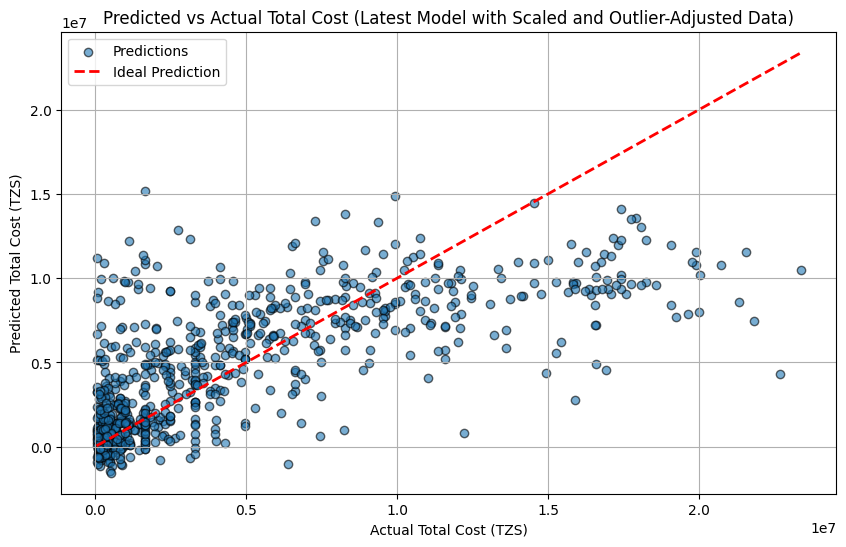

In [19]:
plot_actual_vs_predicted(
    y_actual=y_val_v3, 
    y_pred=y_val_v3_pred, 
    title="Predicted vs Actual Total Cost (Latest Model with Scaled and Outlier-Adjusted Data)"
)

### Summary: Predicted vs Actual Total Cost (Graph Analysis)

#### Key Observations:
1. **Ideal Prediction Line**:
   - The red dashed line represents the ideal case where predicted values perfectly match the actual values.
   - Points closer to this line indicate accurate predictions.

2. **Scatter Distribution**:
   - **Underestimation**: The model consistently under-predicts higher actual total costs.
   - **Clustering**: Most points are concentrated in the lower range of actual costs, with predictions showing limited variability.

3. **Outliers**:
   - Several points deviate significantly from the ideal line, particularly for higher cost values.
   - These outliers likely contribute to the higher errors observed (e.g., MAE, RMSE).

4. **Model Behavior**:
   - The model struggles with:
     - **Capturing higher total costs**: It fails to generalize well for larger values.
     - **Non-linearity**: The relationship between features and the target appears non-linear, which a linear regression model cannot handle effectively.

---

#### Implications:
- **Underfitting**:
   - The model does not capture the complexity of the data, especially for higher cost predictions.
- **Feature Issues**:
   - Current features might lack the ability to explain variations in higher total costs.


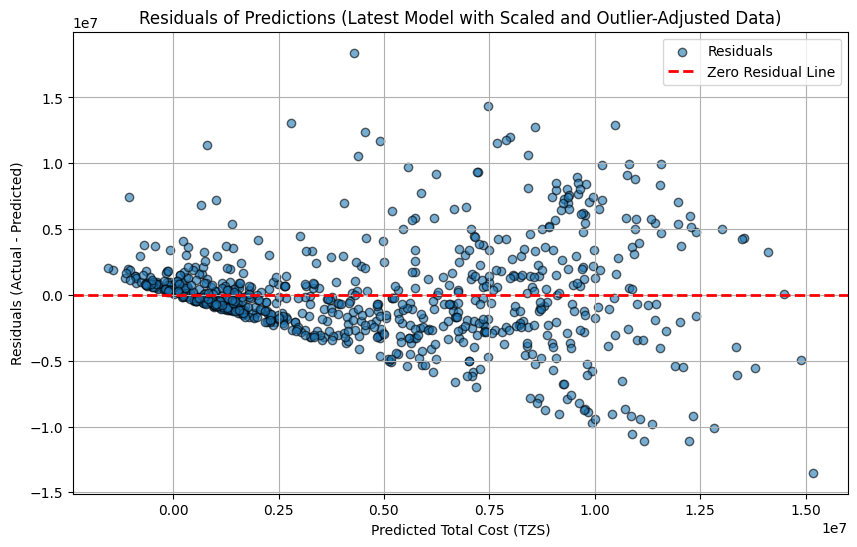

In [20]:
# Residual Plot
residuals_v3 = y_val_v3 - y_val_v3_pred  # Updated variables for residual calculation

plt.figure(figsize=(10, 6))
plt.scatter(y_val_v3_pred, residuals_v3, alpha=0.6, edgecolor='k', label="Residuals")
plt.axhline(y=0, color='r', linestyle='--', lw=2, label="Zero Residual Line")
plt.title("Residuals of Predictions (Latest Model with Scaled and Outlier-Adjusted Data)")
plt.xlabel("Predicted Total Cost (TZS)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid()
plt.show()

### **Residuals of Predictions (Latest Model with Scaled and Outlier-Adjusted Data)**

**Summary of the Residual Plot**  
- **Residuals** represent the difference between actual and predicted values.  
- The **horizontal red dashed line** indicates zero residuals (ideal fit).  
- Points above the red line indicate under-predictions (actual > predicted).  
- Points below the red line indicate over-predictions (actual < predicted).  

---

### **Key Observations**
1. **Non-Random Residual Pattern**  
   - The residuals exhibit a curved pattern rather than a random scatter around the zero line.  
   - This suggests that the linear model may not adequately capture the underlying relationships in the data.

2. **Heteroscedasticity**  
   - Residual variance increases as the predicted values increase.  
   - Larger predictions have greater errors, implying the model struggles to generalize for higher costs.

3. **Outliers**  
   - There are a few extreme residuals both above and below the zero line.  
   - These residuals highlight areas where the model performs poorly, potentially due to remaining outliers or complex relationships in the data.

4. **Systematic Errors**  
   - The downward curvature in residuals indicates a potential **non-linear relationship** between features and the target variable.  
   - A linear model may not be the best fit for this data, and exploring non-linear models (e.g., Random Forest, Gradient Boosting) might improve results.

---

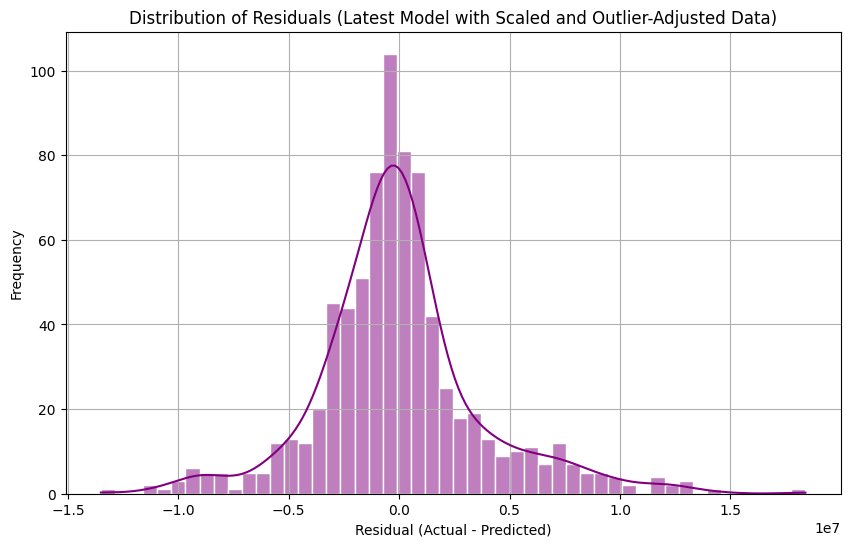

In [21]:
# Residuals Calculation
residuals_v3 = y_val_v3 - y_val_v3_pred

# Plot residuals (errors)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_v3, kde=True, color='purple', edgecolor="white", bins=50)
plt.title("Distribution of Residuals (Latest Model with Scaled and Outlier-Adjusted Data)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### **Residual Plot Explanation**

#### Key Observations:
1. **Distribution of Residuals**:
   - The residuals (difference between actual and predicted values) appear approximately centered around **zero**, which is a good sign for the model.  
   - This suggests that the model is not systematically biased (i.e., no consistent overestimation or underestimation).

2. **Shape of the Distribution**:
   - The residuals display a somewhat **normal distribution** shape with a sharp peak near zero.
   - However, there is some **skewness** to the right, where larger positive residuals indicate cases where the model significantly under-predicted the actual cost.

3. **Spread of Residuals**:
   - While most residuals are tightly concentrated near zero, there are a few **large errors** (both positive and negative) on the tail ends.
   - These outliers suggest that the model struggles to predict total costs for some extreme values.

4. **Variance**:
   - The residuals are not perfectly uniform across the range; the spread slightly increases on the right-hand side.
   - This indicates **heteroscedasticity**, where prediction errors are larger for higher-cost values.


In [22]:
test_data = pd.read_csv("data/cleaned_Test.csv")
test_data.shape

(1601, 24)

In [23]:
# Predict using the trained model
# One-Hot Encoding
X_test = apply_one_hot_encoding(test_data, target_column='total_cost', categorical_columns=full_categorical_columns)
X_test

,total_female,total_male,night_mainland,night_zanzibar,country_encoded,total_people,total_nights,country_AUSTRALIA,country_AUSTRIA,country_BANGLADESH,...,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_Missing,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,10,3,1,2.0,13,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.0,4.0,13,0,70,4.0,13,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3.0,0.0,7,14,26,3.0,21,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2.0,0.0,0,4,10,2.0,4,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,2.0,2.0,10,0,81,4.0,10,False,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.0,1.0,1,0,82,1.0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1597,3.0,1.0,10,5,37,4.0,15,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1598,0.0,1.0,6,0,24,1.0,6,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1599,0.0,1.0,4,0,70,1.0,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [24]:
#-----------------------------
# Check Missing Values
#-----------------------------
print("Missing Values per Column:")
display(X_test.isna().sum())

Missing Values per Column:


total_female                                            0
total_male                                              0
night_mainland                                          0
night_zanzibar                                          0
country_encoded                                         0
                                                       ..
most_impressing_Good service                            0
most_impressing_Missing                                 0
most_impressing_No comments                             0
most_impressing_Satisfies and Hope Come Back            0
most_impressing_Wonderful Country, Landscape, Nature    0
Length: 141, dtype: int64

In [25]:
# Align test features to match training features
X_test_aligned = align_features(X_train_v3, X_test)
X_test_aligned

,total_female,total_male,night_mainland,night_zanzibar,country_encoded,total_people,total_nights,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,...,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_Missing,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,10,3,1,2.0,13,0,0,True,...,False,False,True,False,False,False,False,False,False,False
1,0.0,4.0,13,0,70,4.0,13,0,0,False,...,False,False,False,False,False,False,False,False,False,True
2,3.0,0.0,7,14,26,3.0,21,0,0,False,...,False,False,False,False,False,False,False,True,False,False
3,2.0,0.0,0,4,10,2.0,4,0,0,False,...,False,False,True,False,True,False,False,False,False,False
4,2.0,2.0,10,0,81,4.0,10,0,0,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.0,1.0,1,0,82,1.0,1,0,0,False,...,False,False,False,False,False,False,True,False,False,False
1597,3.0,1.0,10,5,37,4.0,15,0,0,False,...,True,False,True,False,False,False,False,False,False,False
1598,0.0,1.0,6,0,24,1.0,6,0,0,False,...,False,False,True,False,False,False,False,True,False,False
1599,0.0,1.0,4,0,70,1.0,4,0,0,False,...,False,False,True,False,False,False,False,False,False,False


In [26]:
# Make predictions using the trained model
test_predictions = linear_model_v3.predict(X_test_aligned)
test_predictions

array([21183760.1295462 , 15841192.26096806, 19775131.82429502, ...,
        5964564.64844212,  3341731.16742021, 13656872.05076874])

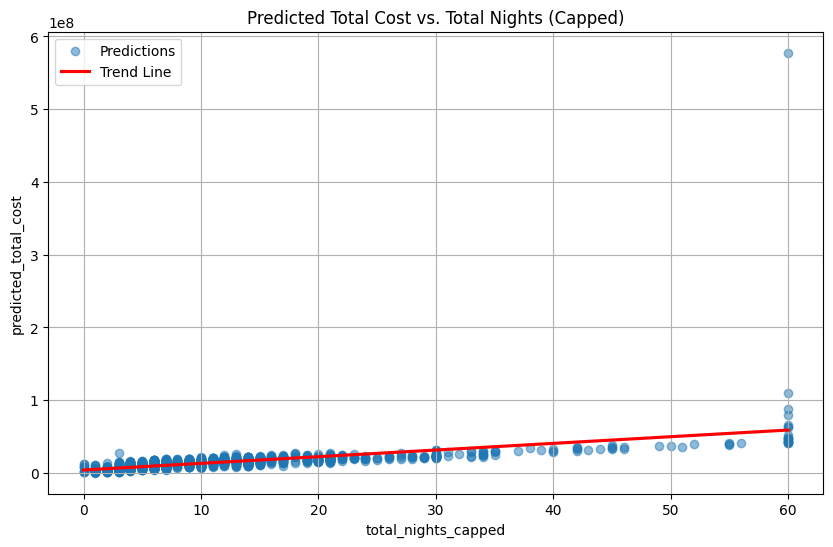

In [27]:
# Add predictions to test_data for analysis
test_data['predicted_total_cost'] = test_predictions

# Cap total_nights at the 99th percentile
cap_value = test_data['total_nights'].quantile(0.99)
test_data['total_nights_capped'] = np.where(
    test_data['total_nights'] > cap_value, cap_value, test_data['total_nights']
)

# Plot predictions vs capped total nights
plt.figure(figsize=(10, 6))
plt.scatter(test_data['total_nights_capped'], test_data['predicted_total_cost'], alpha=0.5, label="Predictions")
plt.title("Predicted Total Cost vs. Total Nights (Capped)")
plt.xlabel("Total Nights (Capped)")
plt.ylabel("Predicted Total Cost")

# Add a smoother trend line
import seaborn as sns
sns.regplot(x="total_nights_capped", y="predicted_total_cost", data=test_data, scatter=False, color="red", ci=None, label="Trend Line")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


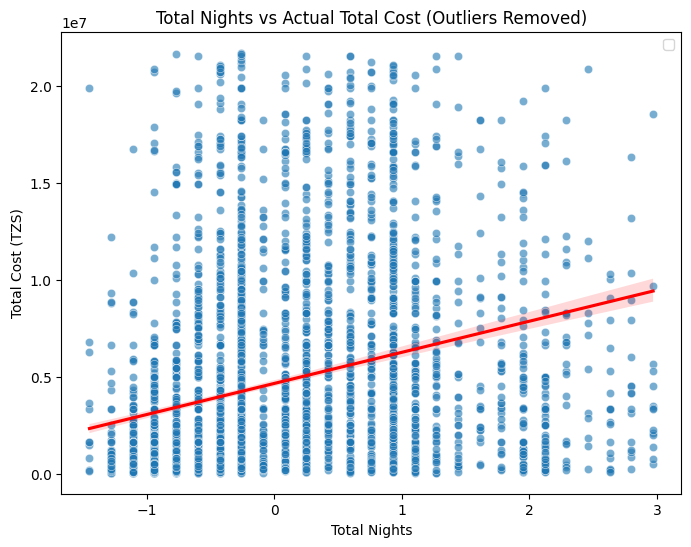

In [28]:
# Define thresholds for outlier removal (e.g., 99th percentile)
cost_threshold_v3 = train_data_v3['total_cost'].quantile(0.99)
nights_threshold_v3 = train_data_v3['total_nights'].quantile(0.99)

# Filter the data to remove outliers
train_data_v3_cleaned = train_data_v3[
    (train_data_v3['total_cost'] <= cost_threshold_v3) &
    (train_data_v3['total_nights'] <= nights_threshold_v3)
]

# Plot 1: Total Nights vs Actual Total Cost (Outliers Removed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data_v3_cleaned['total_nights'], y=train_data_v3_cleaned['total_cost'], alpha=0.6)
sns.regplot(x=train_data_v3_cleaned['total_nights'], y=train_data_v3_cleaned['total_cost'], 
            scatter=False, color='red', line_kws={'label': "Trend Line"})
plt.title("Total Nights vs Actual Total Cost (Outliers Removed)")
plt.xlabel("Total Nights")
plt.ylabel("Total Cost (TZS)")
plt.legend()
plt.show()


In [29]:
# Save Baseline model then
# Assume 'model' is your trained model
save_model(model, 'models/baseline_model.pkl')


Model saved successfully to: models/baseline_model.pkl
